# **# Assignment 7: Comparison Between Libraries**: **Using Pandas**

**Group Name:** RAM

**Group Members:**

Ayaz Rahman Bhuiyan (MCS231023)

Mohammed Raza Asfak Chidimar (MCS231004)

Musab Ibne Ahmad (MCS231017)

Hussein Yusuf Sheikh Mohamed (MCS231024)

**Dataset Link: [Water Quality Prediction](https://www.kaggle.com/datasets/mitanshuchakrawarty/water-quality-prediction)**

### **About Dataset:**

This dataset includes pH, iron, nitrate, chloride, lead, zinc, color, turbidity, fluoride, copper, odor, sulfate, conductivity, manganese, and total dissolved solids. Water source, temperature, air temperature, month, day, and time are also recorded. This dataset helps environmental monitoring and health assessments by providing a holistic view of water quality.

## Loading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mitanshuchakrawarty/water-quality-prediction
! unzip water-quality-prediction

 98% 927M/944M [00:11<00:00, 69.1MB/s]
100% 944M/944M [00:11<00:00, 88.2MB/s]
Archive:  water-quality-prediction.zip
  inflating: dataset.csv             


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import psutil

In [6]:
# Read in the CSV into a Pandas DataFrame

df = pd.read_csv('dataset.csv')

In [7]:
%%time
df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1


## Statistical Measures

In [8]:
# number of elements(cells) in the df
df.size

142964208

In [9]:
# rows and columns in the df
df.shape

(5956842, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   object 
 21  Day                     float64

In [11]:
class DfOverview:

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self):
        return self.df.isna().sum()

    def percentage(self, values):
        return [f"{(value / len(self.df) * 100):.2f}%" for value in values]

    def get_overview(self):
        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype'
        ]

        data = zip(
            self.df.columns,
            self.df.count().values,
            self.missing_value(),
            self.percentage(self.missing_value()),
            [self.df[column].nunique() for column in self.df.columns],
            self.percentage([self.df[column].nunique() for column in self.df.columns]),
            self.df.dtypes
        )

        return pd.DataFrame(data=data, columns=columns)

In [35]:
df_overview = DfOverview(df)
df_overview.get_overview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,Index,5956842,0,0.00%,5956842,100.00%,int64
1,pH,5840788,116054,1.95%,5604784,94.09%,float64
2,Iron,5917089,39753,0.67%,5674876,95.27%,float64
3,Nitrate,5851117,105725,1.77%,5614445,94.25%,float64
4,Chloride,5781311,175531,2.95%,5549789,93.17%,float64
5,Lead,5929933,26909,0.45%,5542383,93.04%,float64
6,Zinc,5800716,156126,2.62%,5567922,93.47%,float64
7,Color,5951103,5739,0.10%,5,0.00%,object
8,Turbidity,5907027,49815,0.84%,5665514,95.11%,float64
9,Fluoride,5767686,189156,3.18%,5537536,92.96%,float64


In [12]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_dtype = df.dtypes

    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

    mis_val_table = mis_val_table[mis_val_table.iloc[:, 0] != 0].sort_values('% of Total Values', ascending=False).round(2)

    print(f"Your selected dataframe has {df.shape[1]} columns.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.")

    return mis_val_table if mis_val_table.shape[0] > 0 else None

In [13]:
def percent_missing_values(df):

    totalCells = np.product(df.shape)

    missingCount = df.isnull().sum()

    totalMissing = missingCount.sum()

    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [29]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Copper,199402,3.35,float64
Sulfate,197418,3.31,float64
Fluoride,189156,3.18,float64
Odor,178891,3.00,float64
Chloride,175531,2.95,float64
Water Temperature,168233,2.82,float64
Conductivity,163861,2.75,float64
Zinc,156126,2.62,float64
pH,116054,1.95,float64
Time of Day,114519,1.92,float64


In [32]:
percent_missing_values(df)

The dataset contains 1.66 % missing values.


## Visualization

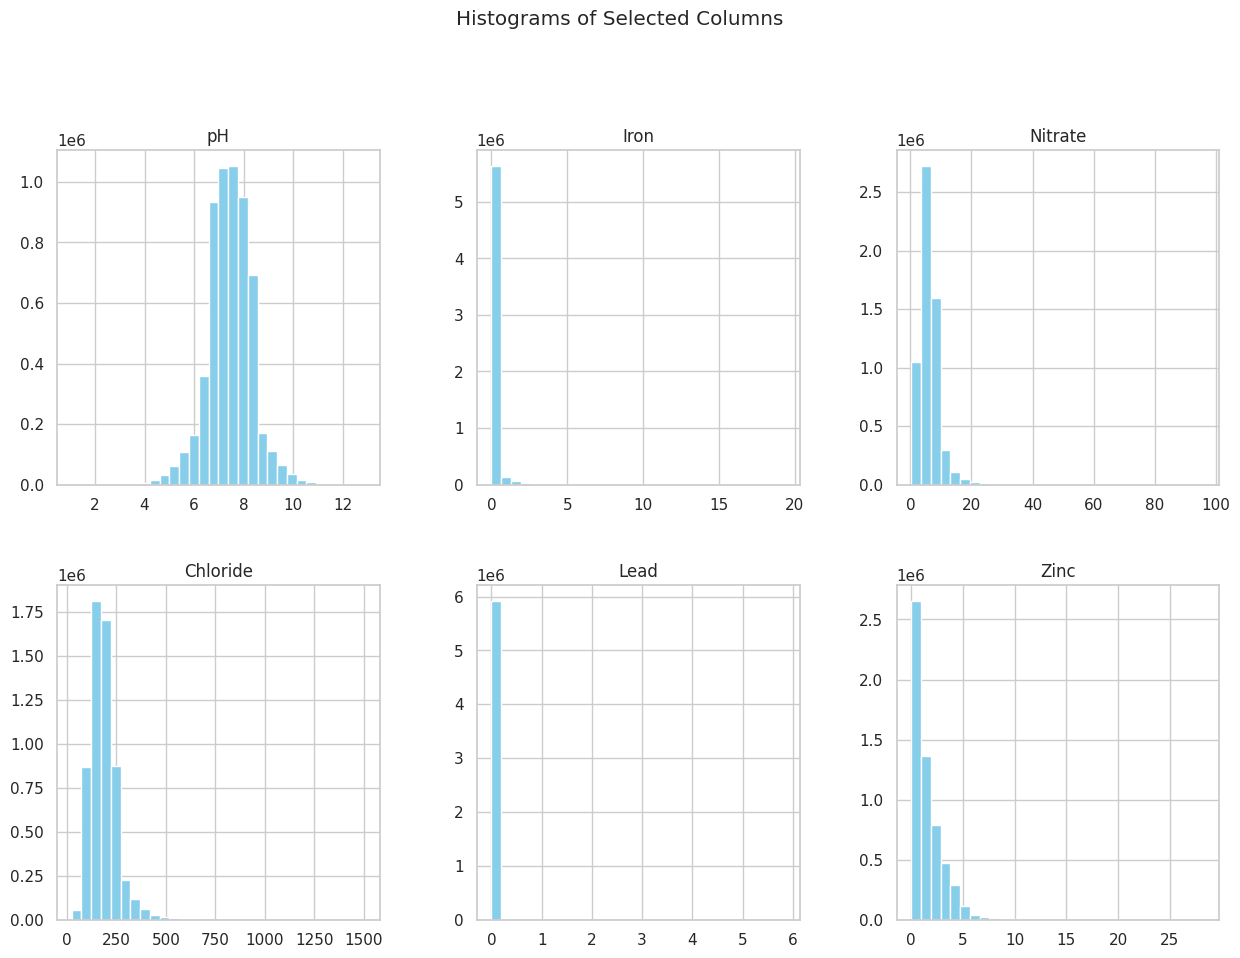

In [17]:
selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc']

# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot histograms for selected columns
df[selected_columns].hist(bins=30, figsize=(15, 10), layout=(2, 3), color='skyblue')
plt.suptitle('Histograms of Selected Columns', y=1.02)
plt.show()

<ipython-input-18-3a08ca1faae9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-18-3a08ca1faae9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-18-3a08ca1faae9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-18-3a08ca1faae9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], color='orange', shade=True)
<ipython-input-18-3a

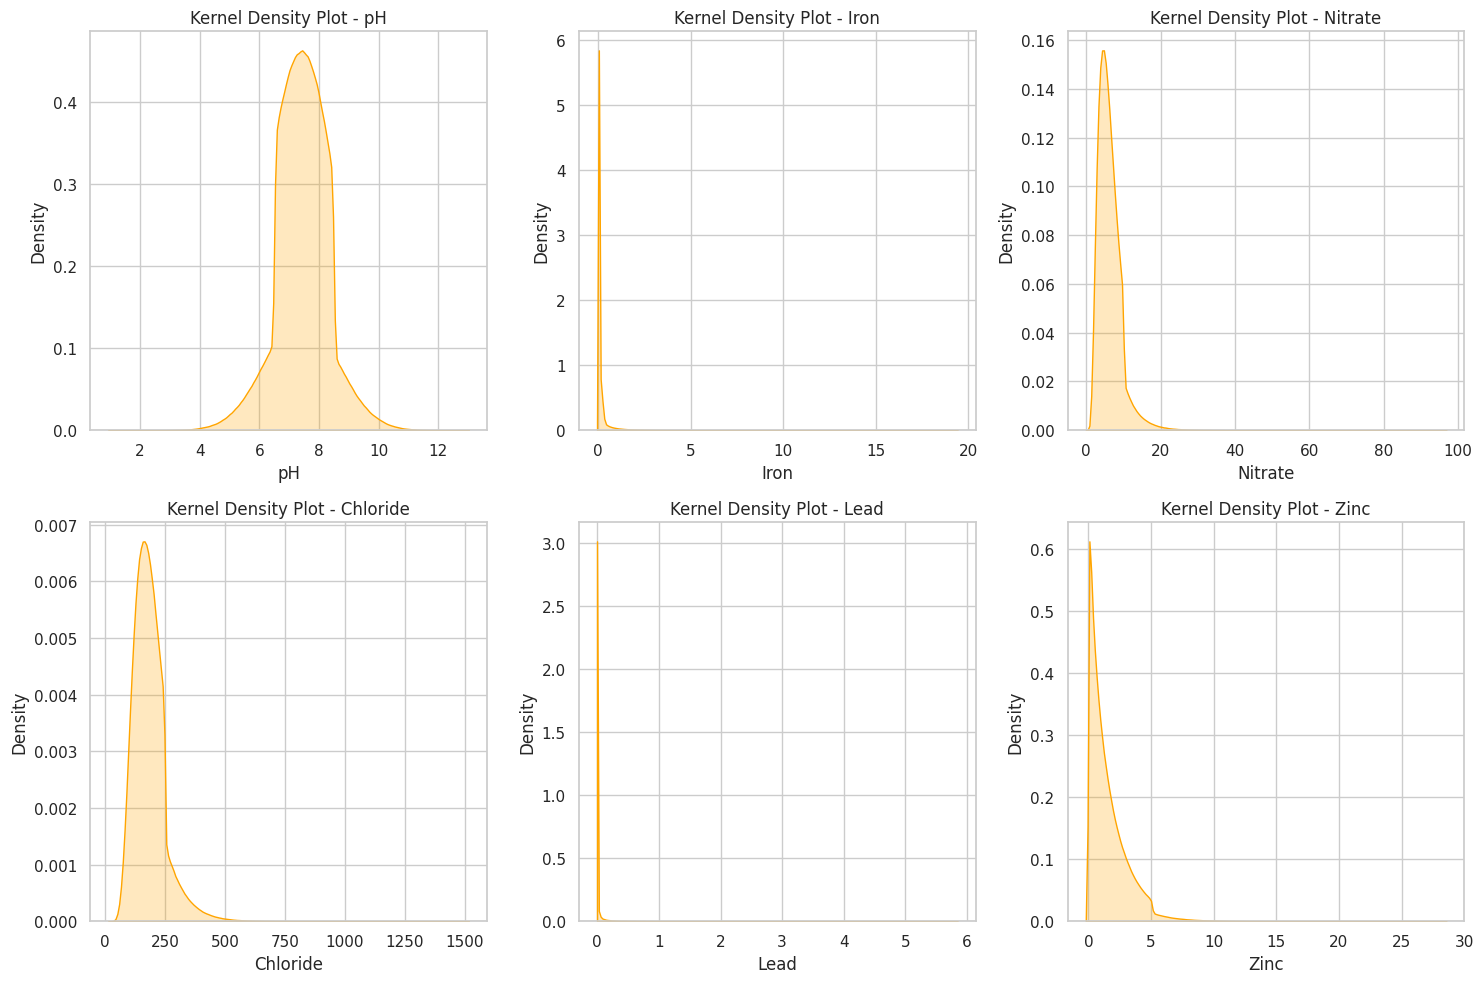

In [18]:
# Plot kernel density plots for selected columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[column], color='orange', shade=True)
    plt.title(f'Kernel Density Plot - {column}')

plt.tight_layout()
plt.show()

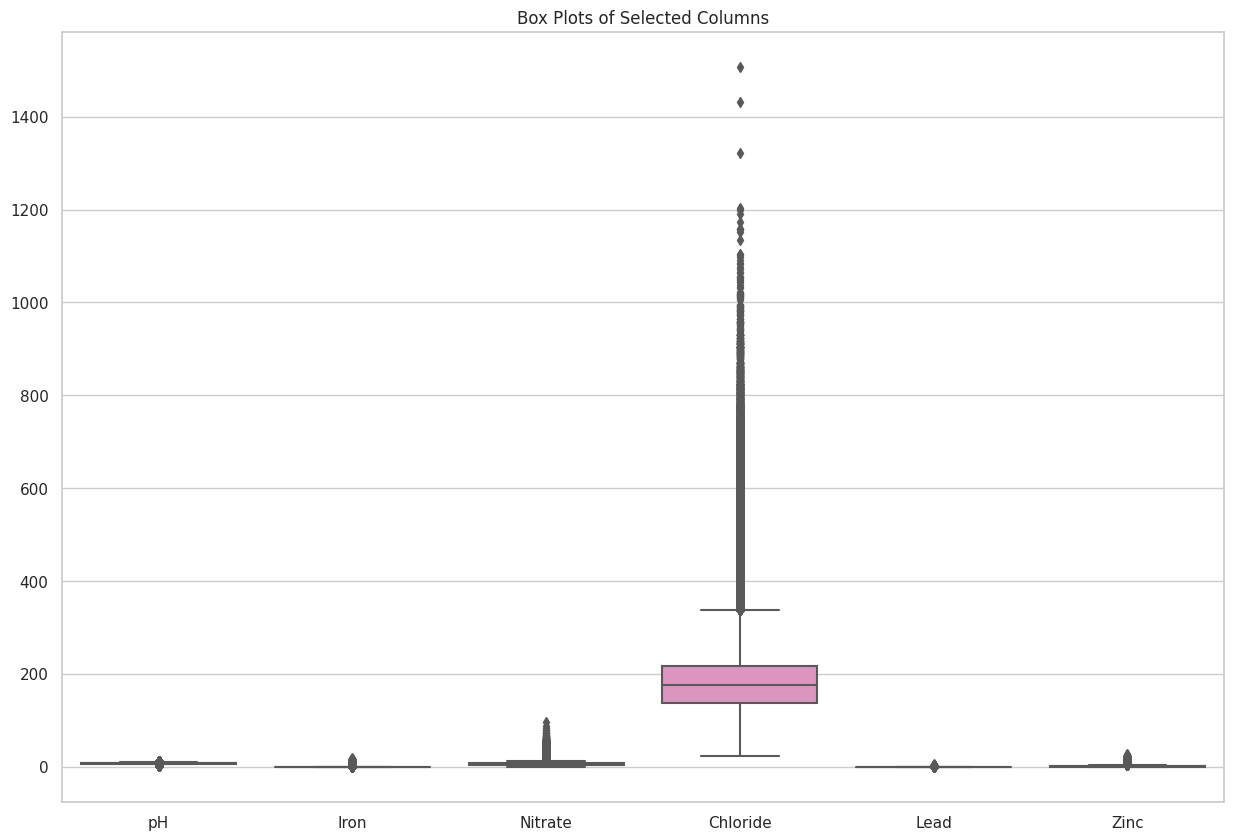

In [19]:
# Plot box plots for selected columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[selected_columns], palette='Set2')
plt.title('Box Plots of Selected Columns')
plt.show()

In [35]:
# Select the specified columns
selected_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Fluoride', 'Copper', 'Sulfate', 'Chlorine', 'Manganese']

# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the sum of values for each column
column_sums = selected_df.sum()

# Create a Pie chart
fig = px.pie(names=column_sums.index, values=column_sums.values, title='Distribution of Water Elements', width=800)
fig.show()


# **Pros & Cons of Pandas**

### **Advantages**



**1. Data Representation:**
Pandas provides a DataFrame object, a two-dimensional tabular data structure that allows for easy manipulation and analysis of data. It offers intuitive indexing, column operations, and supports various data types.


**2. Less Write and More Work Done:**
Pandas offers concise and expressive syntax, allowing you to achieve more with less code. It provides a wide range of built-in functions and methods for data manipulation and analysis, reducing the need for manual coding and increasing productivity.

**3. Efficiently Handles Large Data:**
Despite some performance limitations, Pandas is designed to handle large datasets efficiently. With Pandas, you can process and analyze large datasets without compromising on functionality.


### **Drawbacks**



**1. Memory Consumption:**
Pandas can be memory-intensive, especially when working with large datasets. Loading and manipulating large amounts of data may require substantial memory resources, which can be a constraint in environments with limited memory availability.


**2. Performance Limitations:**
While Pandas provides efficient data processing capabilities, certain operations can be slower compared to lower-level libraries like NumPy. For computationally intensive tasks, Pandas may not offer the same level of performance as specialized libraries or custom implementations.

**3. Lack of Support for Real-Time Data:**
Pandas is primarily designed for working with static, structured datasets. It may not be the ideal choice for real-time data processing or streaming data analysis, where other specialized tools or libraries may be more suitable.

## **Conclusion**

Pandas offers powerful data manipulation and analysis capabilities, providing flexibility, efficiency, and a rich set of features. However, it is essential to consider its limitations, such as speed, memory consumption, and challenges in certain environments or data access scenarios. By understanding these aspects, we can leverage Pandas effectively while mitigating potential drawbacks.